<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/Image_Classification_Happy_vs_Sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.9 MB/s eta 0:00:00


# New Section

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr

In [3]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

Cloning GitHub Repository

In [4]:
!git clone https://github.com/nikhil-xyz/ImageClassification.git 

Cloning into 'ImageClassification'...
remote: Enumerating objects: 10280, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 10280 (delta 18), reused 226 (delta 2), pack-reused 10013
Receiving objects: 100% (10280/10280), 271.17 MiB | 29.15 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Checking out files: 100% (10249/10249), done.


In [5]:
path = os.path.join('ImageClassification', 'data', 'Happy_vs_Sad')

In [6]:
path

'ImageClassification/data/Happy_vs_Sad'

In [7]:
for image_class in os.listdir(os.path.join(path)):
  for image in os.listdir(os.path.join(path, image_class)):
    image_path = os.path.join(path, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        os.remove(image_path)
    except:
      pass

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(path))
data = data.map(lambda x, y: (x/255, y))

Found 194 files belonging to 2 classes.


In [10]:
len(data)

7

In [11]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import layers

In [14]:
# data_augmentation = tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (256, 256, 3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1)
# ])

In [15]:
model = Sequential()
#model.add(data_augmentation)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
history = model.fit(train, epochs = 15, validation_data=val)

Epoch 1/15
4/4 [==============================] - 12s 2s/step - loss: 3.2793 - accuracy: 0.4297 - val_loss: 0.5657 - val_accuracy: 0.7031
Epoch 2/15
4/4 [==============================] - 11s 2s/step - loss: 1.2415 - accuracy: 0.6562 - val_loss: 0.9924 - val_accuracy: 0.6406
Epoch 3/15
4/4 [==============================] - 11s 2s/step - loss: 0.6907 - accuracy: 0.7500 - val_loss: 0.7158 - val_accuracy: 0.6875
Epoch 4/15
4/4 [==============================] - 11s 2s/step - loss: 0.6349 - accuracy: 0.6719 - val_loss: 0.5291 - val_accuracy: 0.6719
Epoch 5/15
4/4 [==============================] - 11s 2s/step - loss: 0.4185 - accuracy: 0.7891 - val_loss: 0.3728 - val_accuracy: 0.7812
Epoch 6/15
4/4 [==============================] - 11s 2s/step - loss: 0.3437 - accuracy: 0.8984 - val_loss: 0.3268 - val_accuracy: 0.9375
Epoch 7/15
4/4 [==============================] - 11s 2s/step - loss: 0.2700 - accuracy: 0.9219 - val_loss: 0.2628 - val_accuracy: 0.8750
Epoch 8/15
4/4 [==================

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [18]:
model.evaluate(test)

1/1 [==============================] - 3s 3s/step - loss: 0.0031 - accuracy: 1.0000


[0.003071993589401245, 1.0]

In [29]:
len(train)

4

In [33]:
labels = []
y_pred = []
iter = train.as_numpy_iterator()
for i in range(len(train)):
  batch = iter.next()
  labels.extend(batch[1])
  temp = (model.predict(batch[0]) > 0.5).astype(int)
  y_pred.extend(temp)

1/1 [==============================] - 0s 401ms/step


In [36]:
labels = np.array(labels)
y_pred = np.array(y_pred)

In [38]:
cm = tf.math.confusion_matrix(labels = labels, predictions = y_pred, num_classes=2)
print(cm)

tf.Tensor(
[[82  0]
 [ 0 46]], shape=(2, 2), dtype=int32)


Text(24.0, 0.5, 'True')

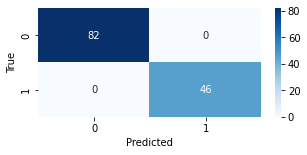

In [39]:
import seaborn as sns
plt.figure(figsize=(5,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
     